In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import plotly
from plotly.express import scatter

In [2]:
data = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape

(768, 9)

In [4]:
X = data.iloc[:, 1:-1]
y = data.iloc[:, -1]

In [6]:
X

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63
764,122,70,27,0,36.8,0.340,27
765,121,72,23,112,26.2,0.245,30
766,126,60,0,0,30.1,0.349,47


In [5]:
X.shape

(768, 7)

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = pd.get_dummies(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

<div style="color:black;
           display:fill;
           background-color:lightpink;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">
    
<p>In the following,  the "NurNet" function recieves specification of the nural network including  these arguments:
-  "norons_in_layers" which is the array indicating the nourouns in each hidden layer (the output and input layers are not included)
-  epochs
-  batch_size

The function returns us the best recall and best accuracy obtained by the nural network and also its model object.

The function is tested for an arbitrary architecture:

In [8]:
def NurNet(norons_in_layers, epochs, batch_size):
    Layers_num=len(norons_in_layers)
    str="tf.keras.models.Sequential([tf.keras.layers.Dense(norons_in_layers[0], activation='relu', input_shape=(7,)),"
    for i in range(1,Layers_num):
        str=str+f"tf.keras.layers.Dense({norons_in_layers[i]}, activation='relu'),"
    str=str+f"tf.keras.layers.Dense(2, activation='softmax')])"    
    model=eval(str)
    model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                  loss=tf.keras.losses.CategoricalCrossentropy(),
                  metrics=[tf.keras.metrics.CategoricalAccuracy(),
                           tf.keras.metrics.Recall(class_id=1)]
                 )
    history=model.fit(X_train, y_train, epochs=epochs,
                      validation_data=(X_test, y_test),
                      batch_size=batch_size)
    keys=list(history.history.keys()) # different accuracy and recalls stored in results
    #print (keys)
    accuracy_train = np.max(history.history['categorical_accuracy'])
    accuracy_test = np.max(history.history[keys[2]])
    recall_train = np.max(history.history[keys[4]])
    recall_test = np.max(history.history[keys[5]])
    return(model , accuracy_train,accuracy_test ,recall_train ,recall_test)

NurNet([25,34,45,36,18,12,7],200, 20)

Epoch 1/200
29/29 [==============================] - 2s 14ms/step - loss: 0.6891 - categorical_accuracy: 0.6424 - recall: 0.0923 - val_loss: 0.6870 - val_categorical_accuracy: 0.6198 - val_recall: 0.0000e+00
Epoch 2/200
29/29 [==============================] - 0s 3ms/step - loss: 0.6807 - categorical_accuracy: 0.6615 - recall: 0.0000e+00 - val_loss: 0.6810 - val_categorical_accuracy: 0.6198 - val_recall: 0.0000e+00
Epoch 3/200
29/29 [==============================] - 0s 3ms/step - loss: 0.6706 - categorical_accuracy: 0.6615 - recall: 0.0000e+00 - val_loss: 0.6708 - val_categorical_accuracy: 0.6198 - val_recall: 0.0000e+00
Epoch 4/200
29/29 [==============================] - 0s 3ms/step - loss: 0.6572 - categorical_accuracy: 0.6615 - recall: 0.0000e+00 - val_loss: 0.6694 - val_categorical_accuracy: 0.6198 - val_recall: 0.0000e+00
Epoch 5/200
29/29 [==============================] - 0s 3ms/step - loss: 0.6492 - categorical_accuracy: 0.6615 - recall: 0.0000e+00 - val_loss: 0.6669 - val_ca

(<keras.engine.sequential.Sequential at 0x7a8160a33250>,
 0.84375,
 0.7846153974533081,
 0.7916666865348816,
 0.835616409778595)

 <div style="color:black;
           display:fill;
           background-color:lightpink;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">
    
<p> Now we test different architectures through some loop and store the results in a dataframe called "results".
    
- We test architectures with 5 to 9 layers with random number of norons in interval [5,50].
- We also check 5 diffierent architectures for any k-layered structure.

You can see the results in the dataframe after that:
    

In [9]:
results= pd.DataFrame(columns=['Layers_num','norons_in_layer', 'model'
                               ,'accuracy_train','accuracy_test' ,
                               'recall_train' ,'recall_test'])
architecture_num=0

In [ ]:
batch_size=50
epochs=200
for layers_num in range(3,10): 
    for archtcture in range(5):
        norons_in_layers = np.random.randint(5, 50 , size=layers_num)
        model,bst_acc_train,bst_acc_test ,bst_rec_train ,bst_rec_test = NurNet(norons_in_layers,epochs, batch_size)
        results.loc[architecture_num]=[layers_num , str(norons_in_layers) ,model ,
                                      bst_acc_train,bst_acc_test ,bst_rec_train ,bst_rec_test]
        architecture_num+=1

Epoch 1/200
12/12 [==============================] - 1s 25ms/step - loss: 0.6701 - categorical_accuracy: 0.6632 - recall_1: 0.0359 - val_loss: 0.6719 - val_categorical_accuracy: 0.6198 - val_recall_1: 0.0000e+00
Epoch 2/200
12/12 [==============================] - 0s 5ms/step - loss: 0.6518 - categorical_accuracy: 0.6615 - recall_1: 0.0000e+00 - val_loss: 0.6662 - val_categorical_accuracy: 0.6198 - val_recall_1: 0.0000e+00
Epoch 3/200
12/12 [==============================] - 0s 5ms/step - loss: 0.6416 - categorical_accuracy: 0.6615 - recall_1: 0.0000e+00 - val_loss: 0.6583 - val_categorical_accuracy: 0.6198 - val_recall_1: 0.0000e+00
Epoch 4/200
12/12 [==============================] - 0s 5ms/step - loss: 0.6314 - categorical_accuracy: 0.6615 - recall_1: 0.0000e+00 - val_loss: 0.6438 - val_categorical_accuracy: 0.6198 - val_recall_1: 0.0000e+00
Epoch 5/200
12/12 [==============================] - 0s 5ms/step - loss: 0.6173 - categorical_accuracy: 0.6597 - recall_1: 0.0154 - val_loss: 0

In [11]:
results

,Layers_num,norons_in_layer,model,accuracy_train,accuracy_test,recall_train,recall_test
0,3,[27 27 18],<keras.engine.sequential.Sequential object at ...,0.829861,0.758974,0.791667,0.726027
1,3,[19 42 41],<keras.engine.sequential.Sequential object at ...,0.835069,0.815385,0.796875,0.698630
2,3,[26 33 36],<keras.engine.sequential.Sequential object at ...,0.847222,0.784615,0.807292,0.726027
3,3,[17 17 5],<keras.engine.sequential.Sequential object at ...,0.821181,0.723077,0.791667,0.698630
4,3,[13 17 34],<keras.engine.sequential.Sequential object at ...,0.817708,0.758974,0.812500,0.684932
5,4,[49 36 24 41],<keras.engine.sequential.Sequential object at ...,0.866319,0.810256,0.796875,0.726027
6,4,[28 40 26 18],<keras.engine.sequential.Sequential object at ...,0.852431,0.784615,0.786458,0.753425
7,4,[46 22 44 38],<keras.engine.sequential.Sequential object at ...,0.871528,0.794872,0.796875,0.753425
8,4,[16 28 25 49],<keras.engine.sequential.Sequential object at ...,0.842014,0.753846,0.807292,0.767123
9,4,[20 30 47 22],<keras.engine.sequential.Sequential object at ...,0.848958,0.764103,0.786458,0.753425


# Best architecture with most accuracy 
## best train_accuracy=0.93 and test_accuracy=0.90

,Layers_num,norons_in_layer,model,accuracy_train,accuracy_test,recall_train,recall_test
19,6,[45 37 39 17 15 44],<keras.engine.sequential.Sequential object at ...,0.949653,0.923077,0.796875,0.808219
17,6,[29 46 39 33 47 42],<keras.engine.sequential.Sequential object at ...,0.930556,0.866667,0.770833,0.794521
27,8,[33 24 12 42 7 32 36 45],<keras.engine.sequential.Sequential object at ...,0.897569,0.861538,0.791667,0.808219


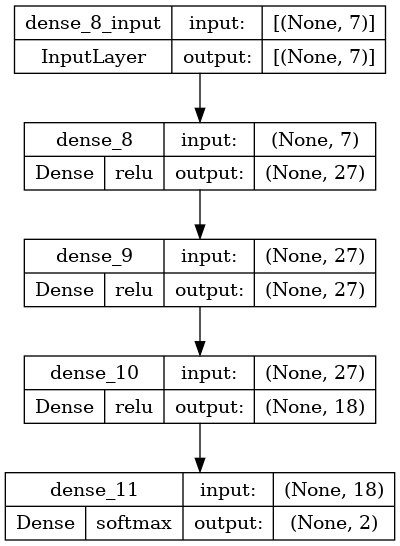

In [12]:
results_sorted_acc = results.sort_values(by='accuracy_test' ,ascending= False)
display(results_sorted_acc.head(3))
best_architecture = results.iloc[0].model
from tensorflow.keras.utils import plot_model
plot_model(best_architecture, show_layer_activations=True, show_shapes=True)


In [13]:
y_pred = np.argmax(best_architecture.predict(X_test), axis=1)  

6/6 [==============================] - 0s 2ms/step


# Best architecture with highest recall 
## best train_recall=0.81 and test_recall=0.84

,Layers_num,norons_in_layer,model,accuracy_train,accuracy_test,recall_train,recall_test
32,9,[41 27 6 39 26 42 20 23 24],<keras.engine.sequential.Sequential object at ...,0.906250,0.841026,0.776042,0.849315
26,8,[16 32 20 40 11 23 27 10],<keras.engine.sequential.Sequential object at ...,0.866319,0.846154,0.786458,0.849315
33,9,[35 11 15 25 31 18 15 24 35],<keras.engine.sequential.Sequential object at ...,0.861111,0.789744,0.791667,0.835616
31,9,[ 9 46 23 14 35 31 16 38 5],<keras.engine.sequential.Sequential object at ...,0.880208,0.841026,0.802083,0.821918
29,8,[22 6 5 21 34 16 23 48],<keras.engine.sequential.Sequential object at ...,0.847222,0.810256,0.786458,0.821918


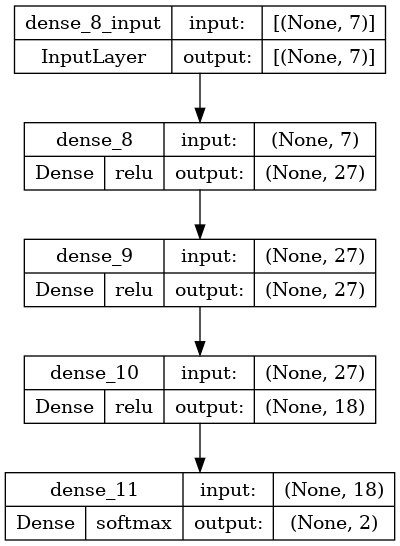

In [14]:
results_sorted_rec = results.sort_values(by='recall_test' ,ascending= False)
display(results_sorted_rec.head(5))
best_architecture = results.iloc[0].model
from tensorflow.keras.utils import plot_model
plot_model(best_architecture, show_layer_activations=True, show_shapes=True)


In [15]:
y_pred = np.argmax(best_architecture.predict(X_test), axis=1) 

6/6 [==============================] - 0s 1ms/step
